In [1]:
import numpy as np
import glob
import cv2
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from scipy.fftpack import fft

In [2]:
def get_data():
    X = []
    Y = []
    csv = pd.read_csv('archive/chinese_mnist.csv')
    
    for row in csv.itertuples():
        suite_id = row[1]
        sample_id = row[2]
        code = row[3]
        file_name = f"input_{suite_id}_{sample_id}_{code}.jpg"
        x = cv2.imread(f"archive/data/data/{file_name}", cv2.IMREAD_GRAYSCALE)
        X.append(x)
        Y.append(code-1)
        
    return np.asarray(X), np.asarray(Y)

In [3]:
X, Y = get_data()

In [4]:
classes = ["0",
               "1",
               "2",
               "3",
               "4",
               "5",
               "6",
               "7",
               "8",
               "9",
               "10",
               "100",
               "1000",
               "10,000",
               "100 Million"
              ]

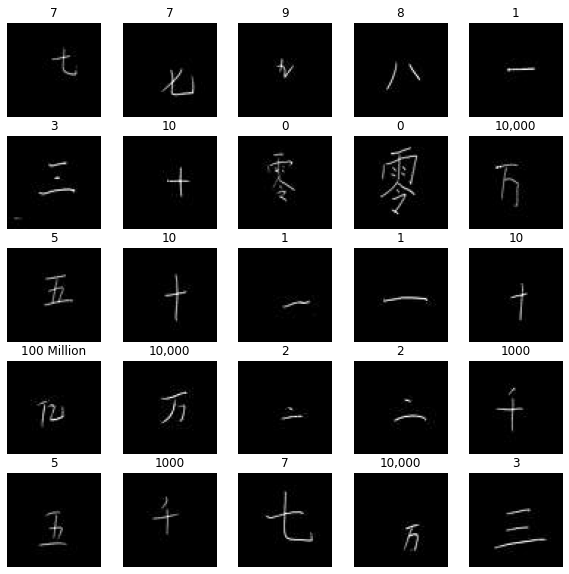

In [5]:
def display_images(data, label, n_rows=3, n_cols=3):
    plt.figure(figsize=(n_cols * 2, n_rows * 2))
    
    arr = np.random.choice(15000, size=(n_rows * n_cols), replace=False)
    
    for row in range(n_rows):
        for col in range(n_cols):
            
            index = n_cols * row + col
            
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(data[arr[index]], cmap="gray")
            plt.title(classes[label[arr[index]]])
            plt.axis('off')
            
    plt.show()

display_images(X, Y, 5, 5)

In [6]:
def perform_pca(images, n_components):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(images)

def classify_images(train_images, train_labels, test_images):
    svm = SVC()
    svm.fit(train_images, train_labels)
    return svm.predict(test_images)

X_processed = [image.flatten() for image in X]
X_pca = perform_pca(X_processed, n_components=100)
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2)

In [7]:
print(X_train.shape)

(12000, 100)


In [8]:
y_pred = classify_images(X_train, y_train, X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.822


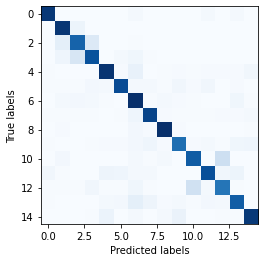

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()